In [133]:
import pandas as pd
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,  RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
%config Completer.use_jedi = False
%matplotlib inline

In [144]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submission=pd.read_csv('submission.csv')

In [7]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [145]:
train['Sex'].replace({'male':0,'female':1},inplace=True)

In [146]:
test['Sex'].replace({'male':0,'female':1},inplace=True)

In [147]:
test['Fare'].fillna(30,inplace=True)

In [148]:
train['Fare'].fillna(30,inplace=True)

In [149]:
train['Age'].median()

28.0

In [152]:
train['Age'].fillna(28,inplace=True)

In [153]:
test['Age'].fillna(28,inplace=True)

<AxesSubplot:>

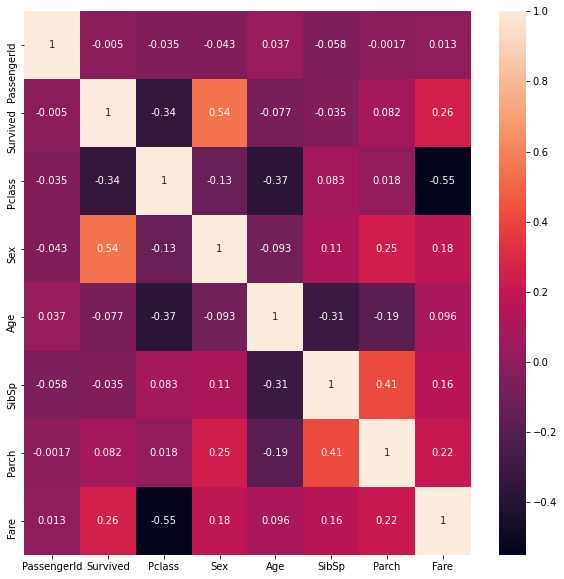

In [150]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True)

In [151]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [172]:
features=['Sex','Pclass','Fare','Age','SibSp','Parch']
X_train=train[features]
Y_train=train['Survived']
X_test=test[features]

 SelectKBest 로 features에 있는 모든 파라미터 중에 k개만큼 랜덤으로 골라서 최고의 파라미터 집합을 찾는다.

In [173]:
test1 = SelectKBest(score_func=f_classif, k=4)
fit = test1.fit(X_train, Y_train)
X_train = fit.transform(X_train)
X_test = fit.transform(X_test)

In [174]:
print(features)
print(X_test)

['Sex', 'Pclass', 'Fare', 'Age', 'SibSp', 'Parch']
[[ 0.      3.      7.8292  0.    ]
 [ 1.      3.      7.      0.    ]
 [ 0.      2.      9.6875  0.    ]
 ...
 [ 0.      3.      7.25    0.    ]
 [ 0.      3.      8.05    0.    ]
 [ 0.      3.     22.3583  1.    ]]


In [199]:
model1=RandomForestRegressor(n_estimators=1000,max_depth=9,max_features='auto',min_samples_split=0.01,n_jobs=-1)
model1.fit(X_train,Y_train)

RandomForestRegressor(max_depth=9, min_samples_split=0.01, n_estimators=1000,
                      n_jobs=-1)

In [180]:
param_grid = {
    'n_estimators': [100,200],
    'max_depth': [ 8, 9, 10],
    'min_samples_split': [0.01, 0.02, 0.005],
    'max_features': ['auto', 'sqrt'],
}
kf = KFold(random_state=30,
           n_splits=10,
           shuffle=True,
          )

In [181]:
grid_search = GridSearchCV(estimator=RandomForestRegressor(), 
                           param_grid=param_grid, 
                           cv=kf, 
                           n_jobs=-1, 
                           verbose=2
                          )
grid_search.fit(X_train,Y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=30, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [8, 9, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [0.01, 0.02, 0.005],
                         'n_estimators': [100, 200]},
             verbose=2)

In [182]:
grid_search.best_params_

{'max_depth': 8,
 'max_features': 'auto',
 'min_samples_split': 0.005,
 'n_estimators': 100}

In [196]:
pre3=grid_search.predict(X_test)

In [197]:
submission['Survived']=pre3

In [198]:
submission.to_csv('model1.csv',index=False)